In [3]:
%pip install scikit-learn pd keras imblearn seaborn xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost  as xgb

import pandas as pd

import numpy as np

from numpy import std, mean

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
import time


from ClasificadorClasico import ClasificadorClasico

### Configuración del experimento

In [5]:
PLOT = True
BINARY = True
# TYPE = 'wrist'

Inicialización

In [6]:
file_path = '../audio_features.csv'  # Ruta del archivo CSV
data = pd.read_csv(file_path)

# Crear la variable X excluyendo 'filename' y 'label'
X = data.drop(columns=['filename', 'label'])
nan_values = X.isna().sum()

# Mostrar solo las columnas con NaN
nan_columns = nan_values[nan_values > 0]
print(nan_columns)

# Crear la variable y que solo contenga 'label'
y = data['label']

Xscaler = MinMaxScaler(feature_range=(0, 1))
Xscaler.fit(X)
scaled_X = Xscaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42, stratify=y)
#Oversampling
X_train, y_train = SMOTE().fit_resample(X_train, y_train)


Series([], dtype: int64)


In [7]:
# df = pd.read_csv(f"../Conjuntos de datos/Agregados/WESAD_feats4_{TYPE}.csv")
# if BINARY:
#     df["label"] = df["label"].apply(lambda x: 1 if x == 2 else 0)

# X = df.drop(["Unnamed: 0","label", "subject"], axis=1)
# y_df = df["label"]

# Xscaler = MinMaxScaler(feature_range=(0, 1))
# Xscaler.fit(X)
# scaled_X = Xscaler.transform(X)

# X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_df, test_size=0.3)

# #Oversampling
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)


In [8]:
clasificadores = []

# XGBoost









Fitting 30 folds for each of 1 candidates, totalling 30 fits


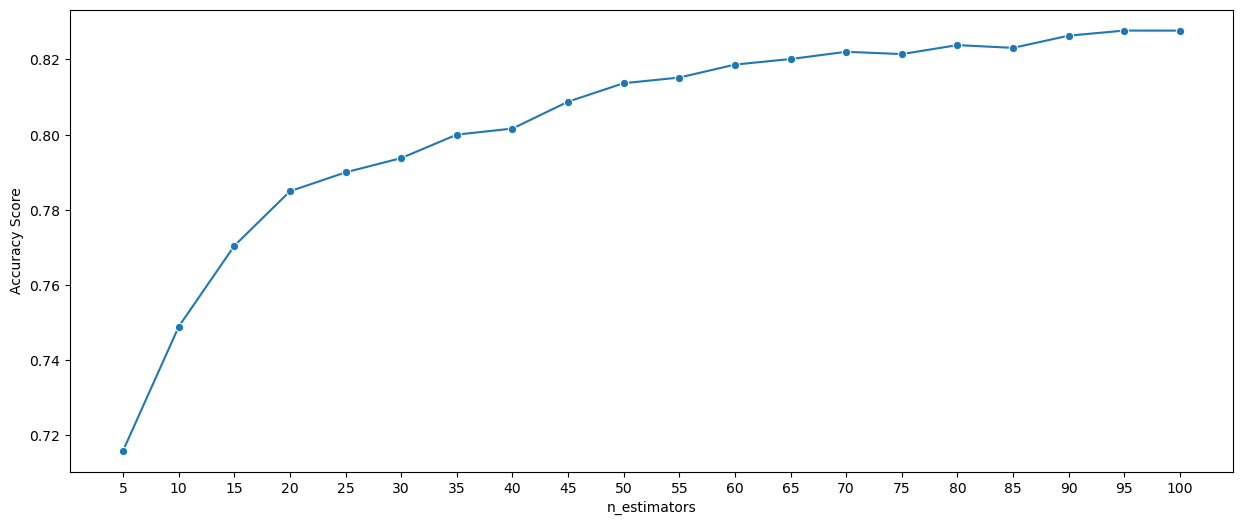

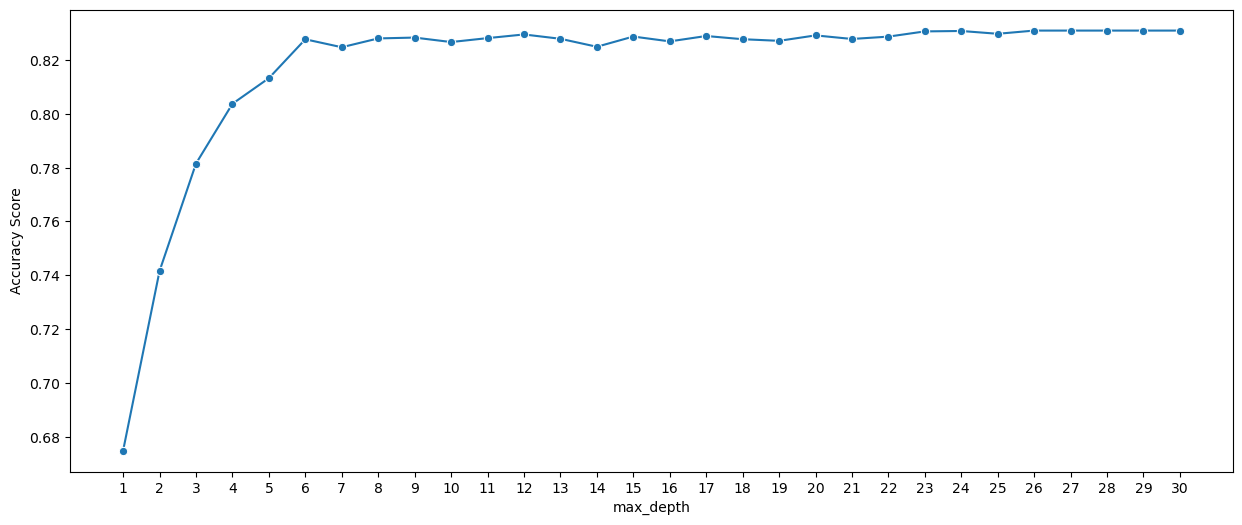

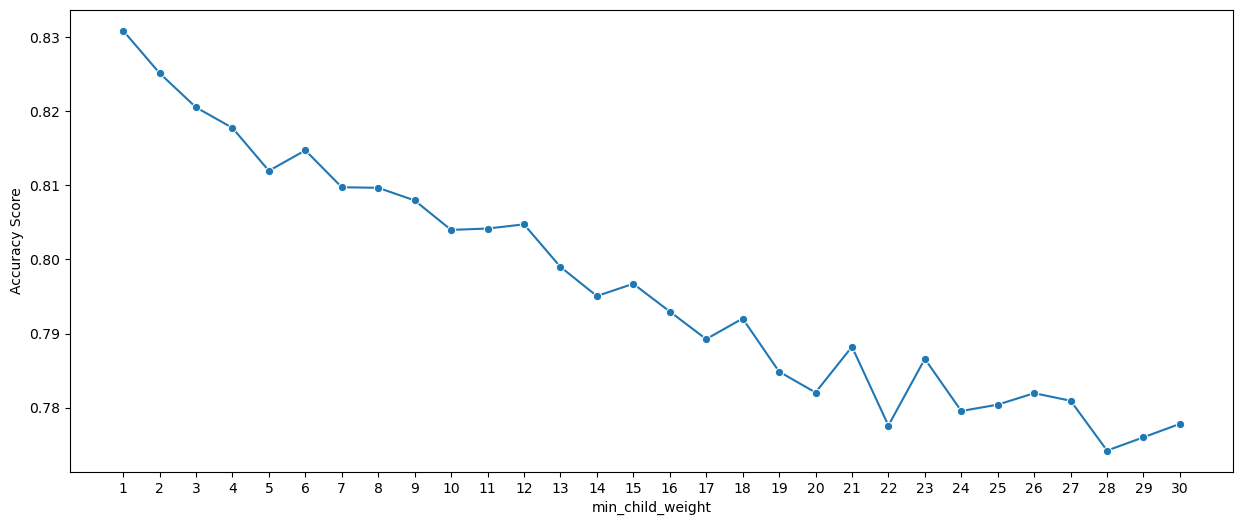

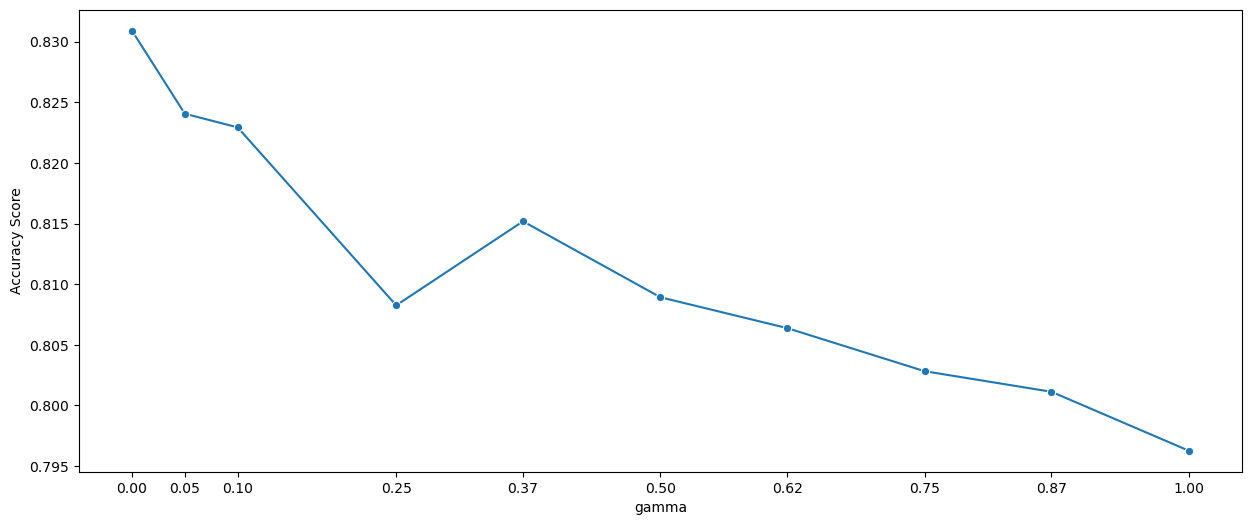

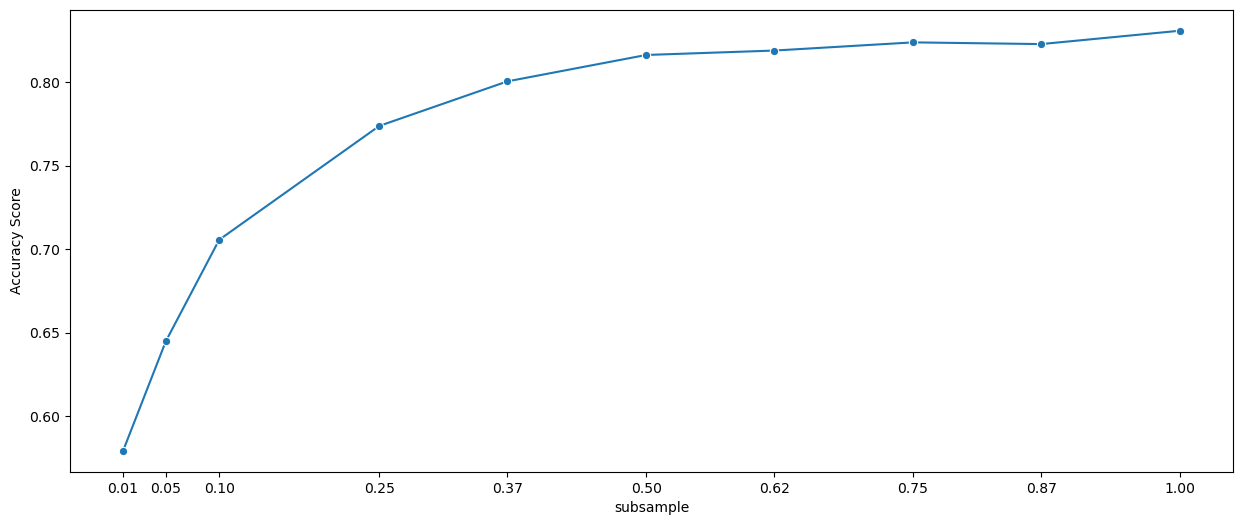

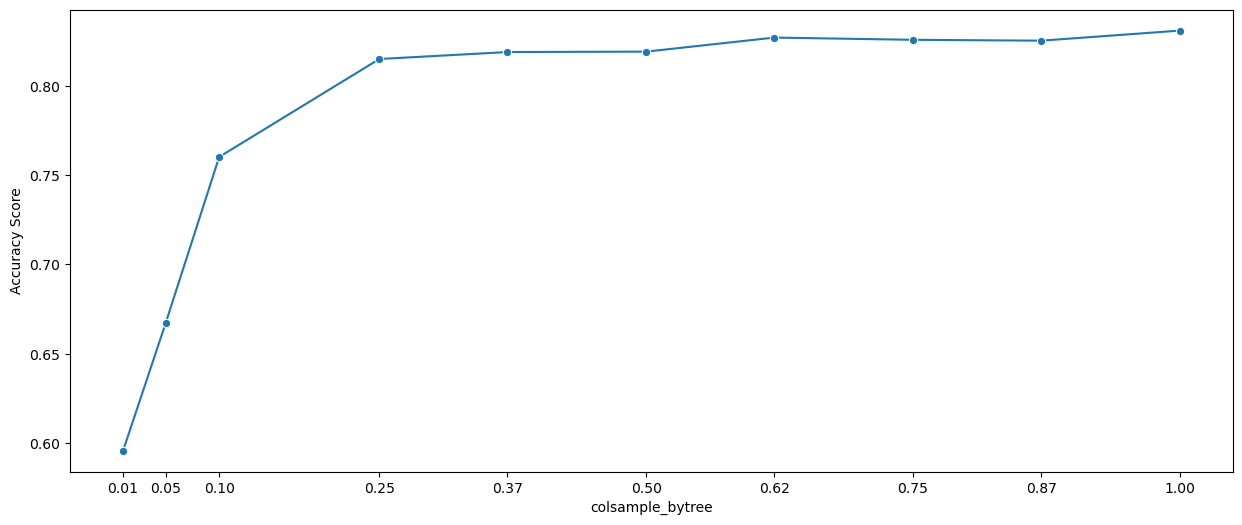

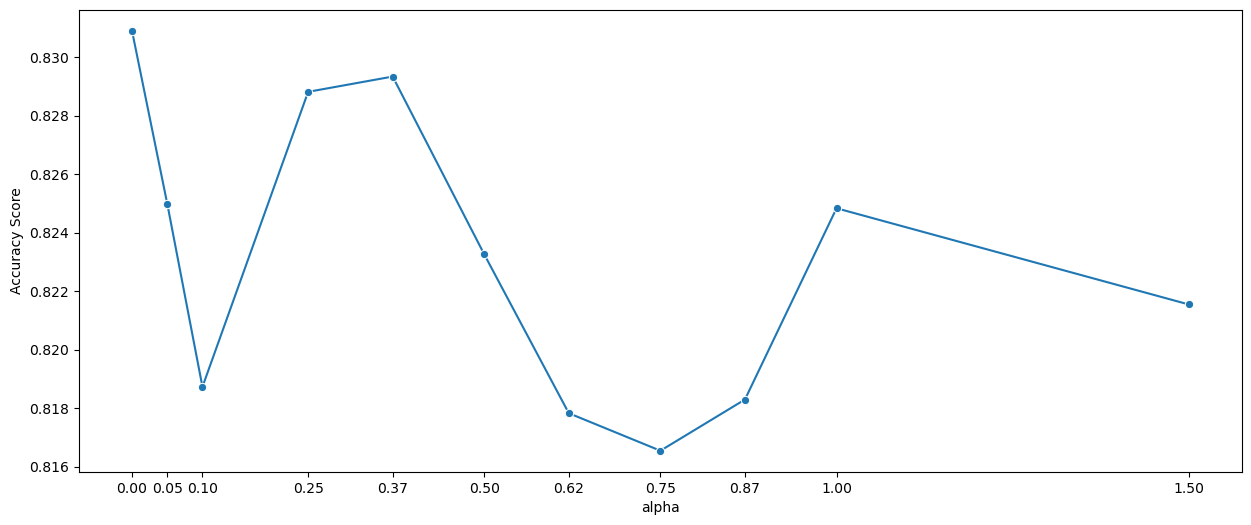

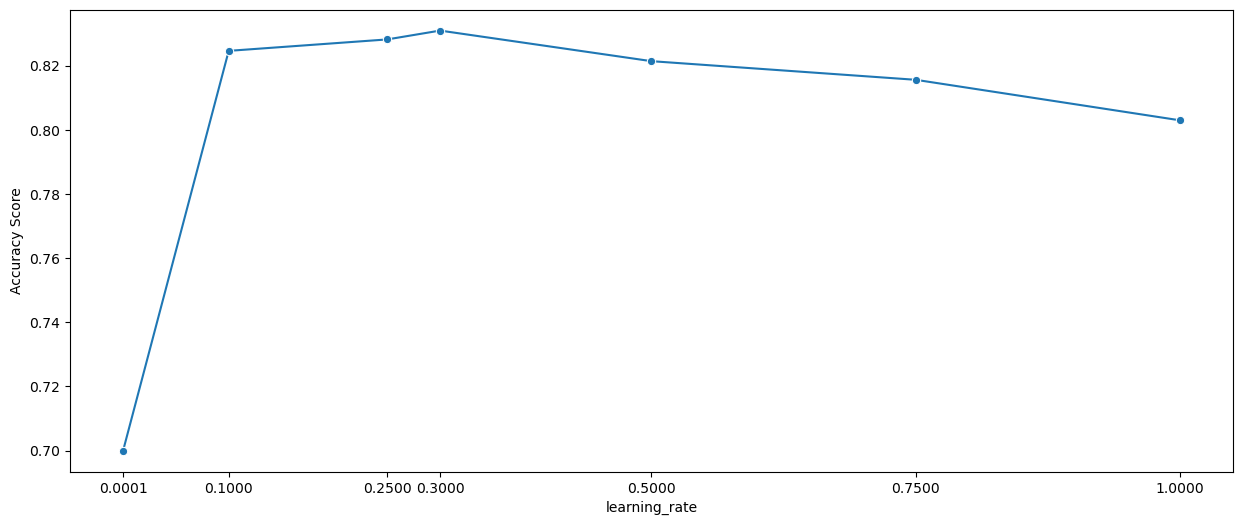

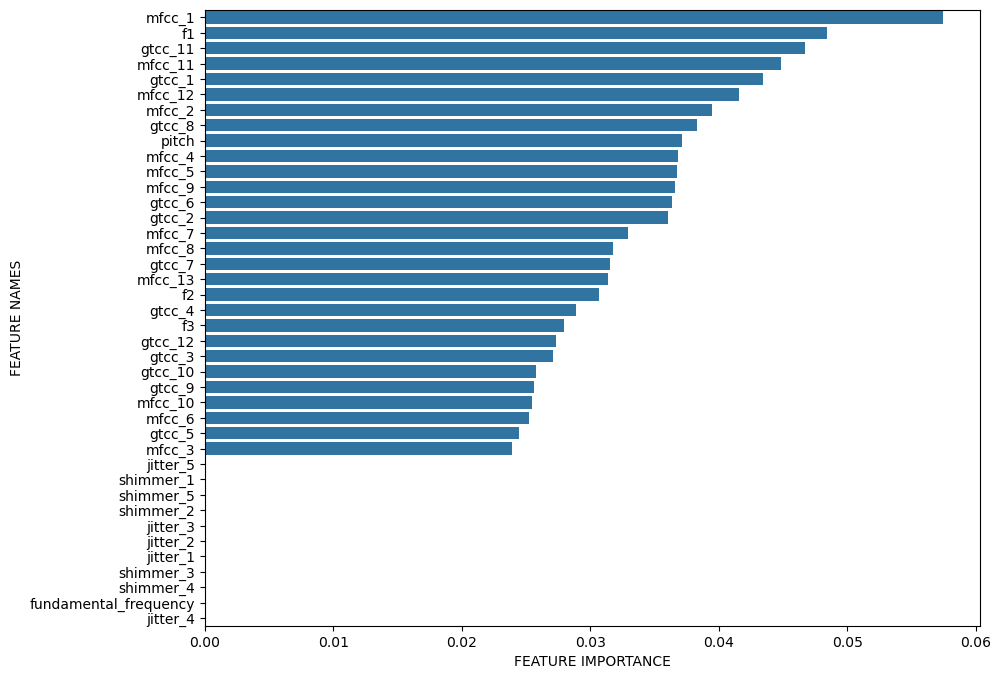

In [9]:
XGBoost = ClasificadorClasico(xgb.XGBClassifier(), 'XGB', X_train, y_train, X.columns)

XGBoost.fit_and_plot('n_estimators', [i * 5 for i in range (1,21)], PLOT);
XGBoost.fit_and_plot('max_depth', [i for i in range (1,31)], PLOT);
XGBoost.fit_and_plot('min_child_weight', [i for i in range (1,31)], PLOT);
XGBoost.fit_and_plot('gamma', [0, 0.05, 0.1, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 1], PLOT);
XGBoost.fit_and_plot('subsample', [0.01, 0.05, 0.1, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 1], PLOT);
XGBoost.fit_and_plot('colsample_bytree', [0.01, 0.05, 0.1, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 1], PLOT);
XGBoost.fit_and_plot('alpha', [0, 0.05, 0.1, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 1, 1.5], PLOT);
XGBoost.fit_and_plot('learning_rate', [0.0001, 0.1, 0.25, 0.3, 0.5, 0.75, 1], PLOT);

XGBoost.plot_feature_importance()
clasificadores.append(XGBoost)


# GaussianNB

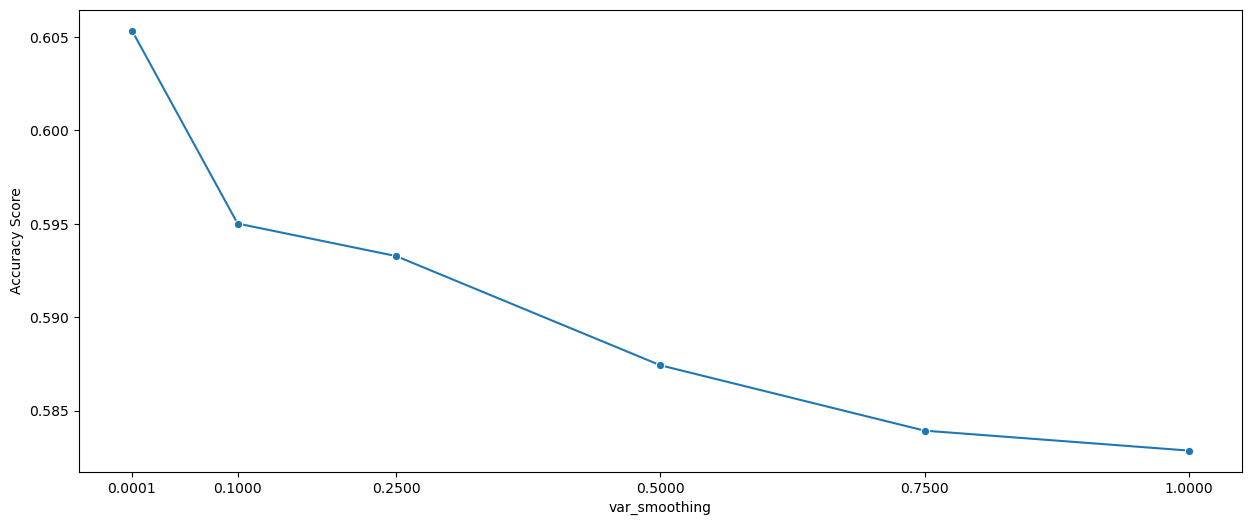

In [10]:
GaussianNB = ClasificadorClasico(GaussianNB(), 'GNB', X_train, y_train, X.columns)
GaussianNB.fit_and_plot( 'var_smoothing',  [0.0001, 0.1, 0.25, 0.5, 0.75, 1], PLOT);
clasificadores.append(GaussianNB)

# GaussianProcessClassifier

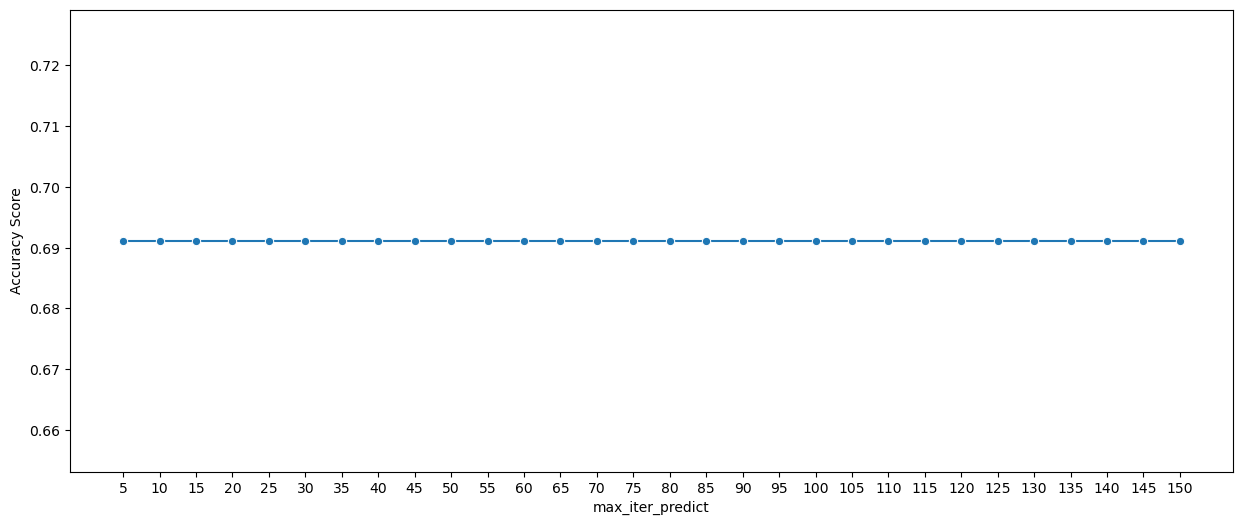

In [15]:
GaussianProcessClassifier = ClasificadorClasico(GaussianProcessClassifier(), 'GPC', X_train, y_train, X.columns)
#GaussianProcessClassifier.fit_and_plot( 'kernel', [RBF(), DotProduct(), Matern(),  RationalQuadratic(), WhiteKernel()], False)
GaussianProcessClassifier.fit_and_plot( 'max_iter_predict', [i * 5 for i in range (1,31)], PLOT)
#GaussianProcessClassifier.plot_feature_importance()
clasificadores.append(GaussianProcessClassifier)

# AdaBoostClassifier

c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Fitting 30 folds for each of 1 candidates, totalling 30 fits


c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


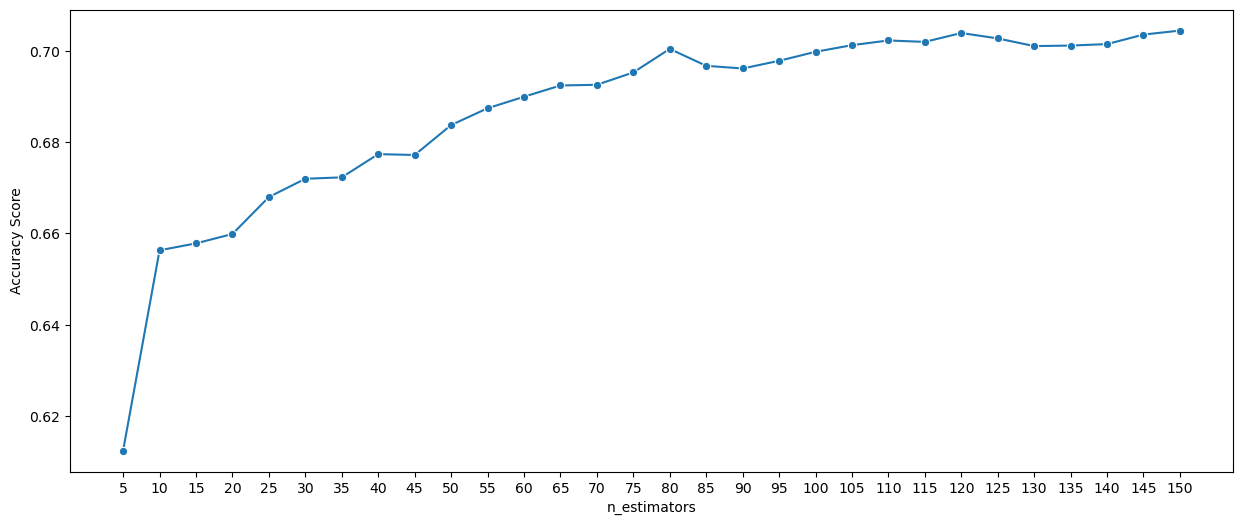

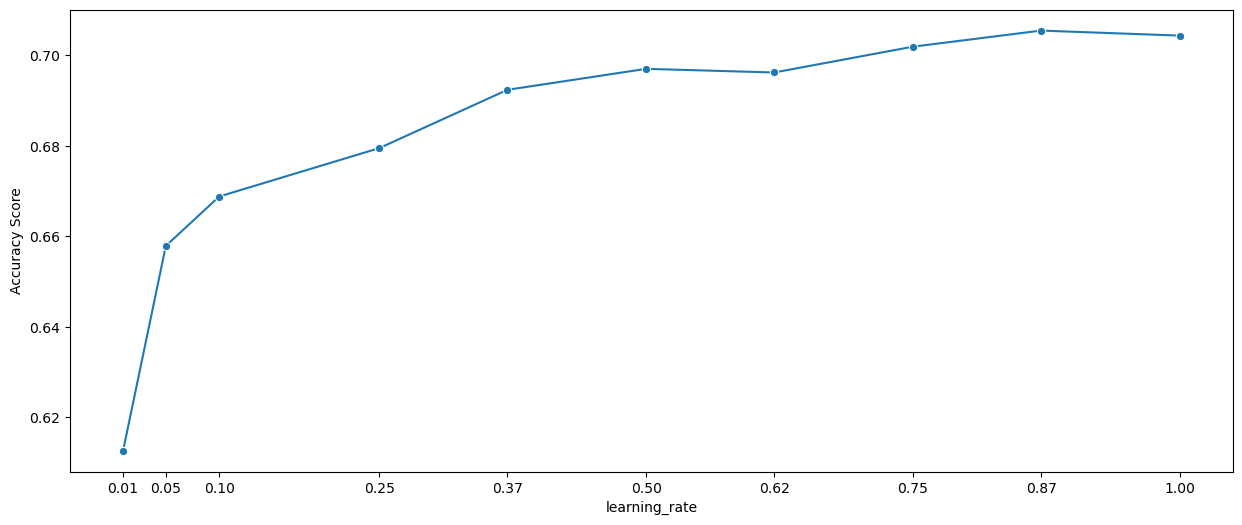

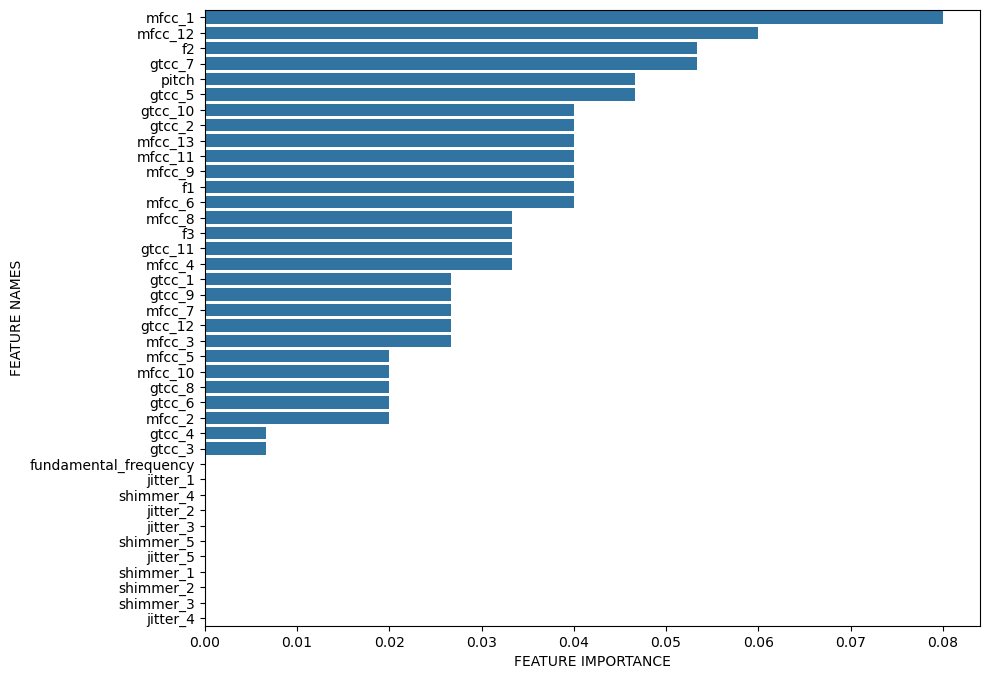

In [16]:
AdaBoostClassifier = ClasificadorClasico(AdaBoostClassifier(), 'ADA', X_train, y_train, X.columns)
AdaBoostClassifier.fit_and_plot( 'n_estimators', [i * 5 for i in range (1,31)], PLOT);
AdaBoostClassifier.fit_and_plot( 'learning_rate', [0.01, 0.05, 0.1, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 1], PLOT);
AdaBoostClassifier.plot_feature_importance()
clasificadores.append(AdaBoostClassifier)

# GradientBoostingClassifier







Fitting 30 folds for each of 1 candidates, totalling 30 fits


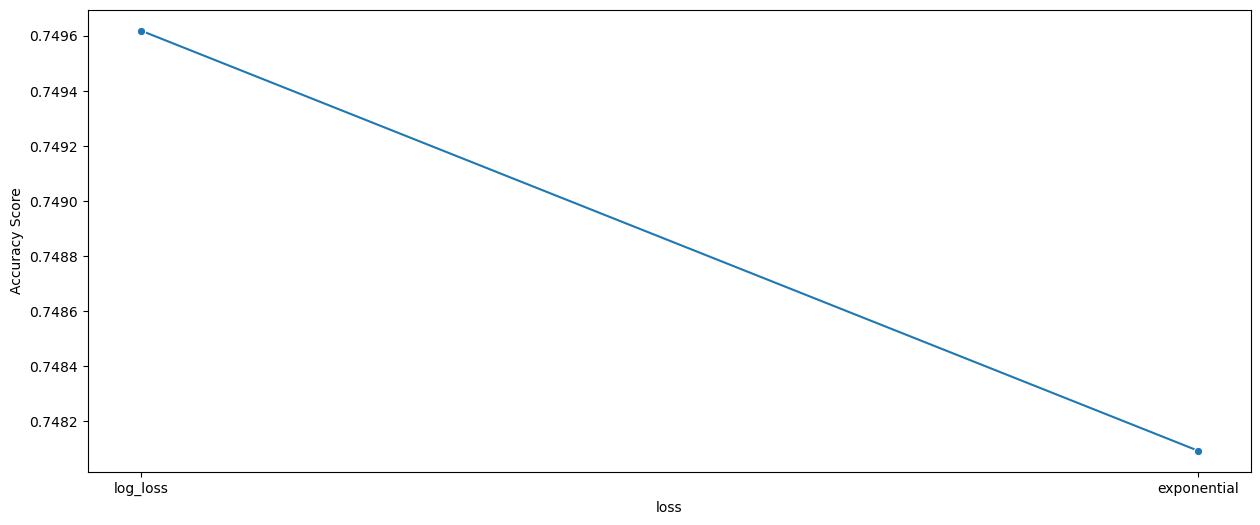

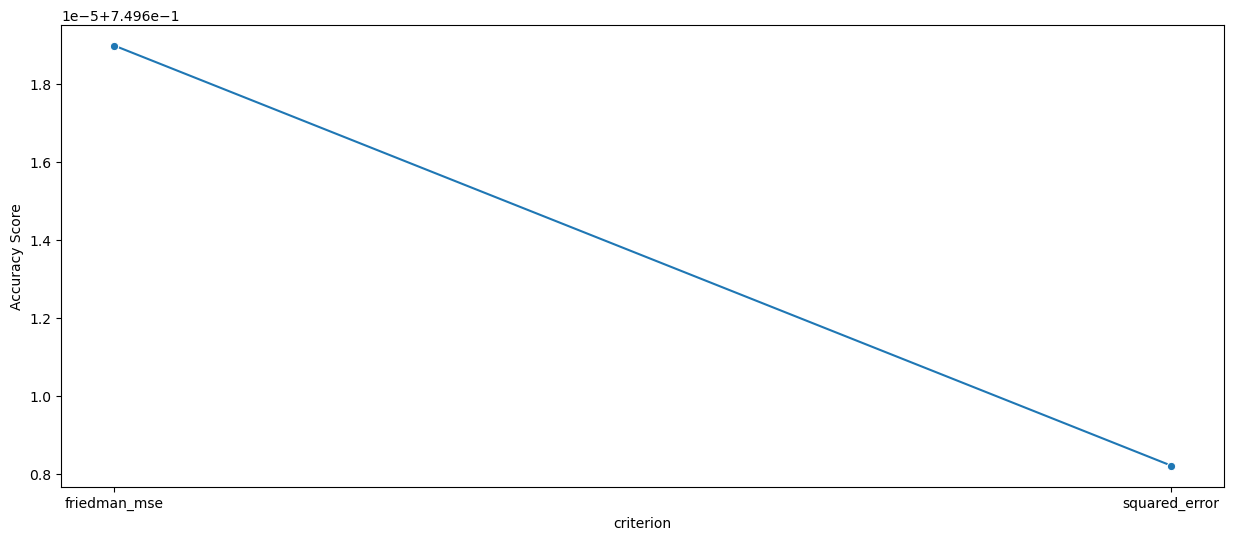

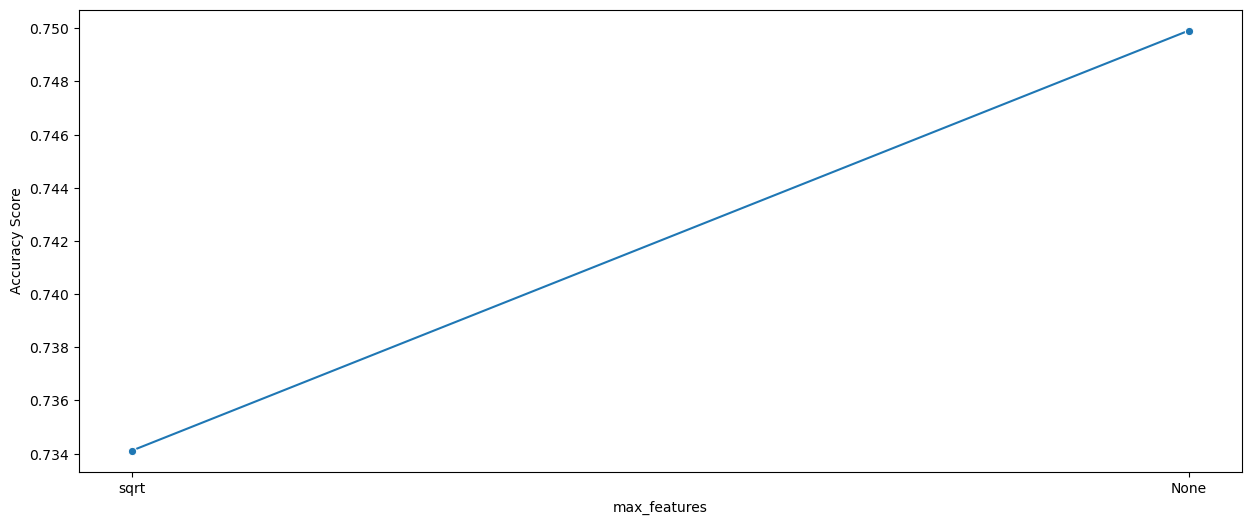

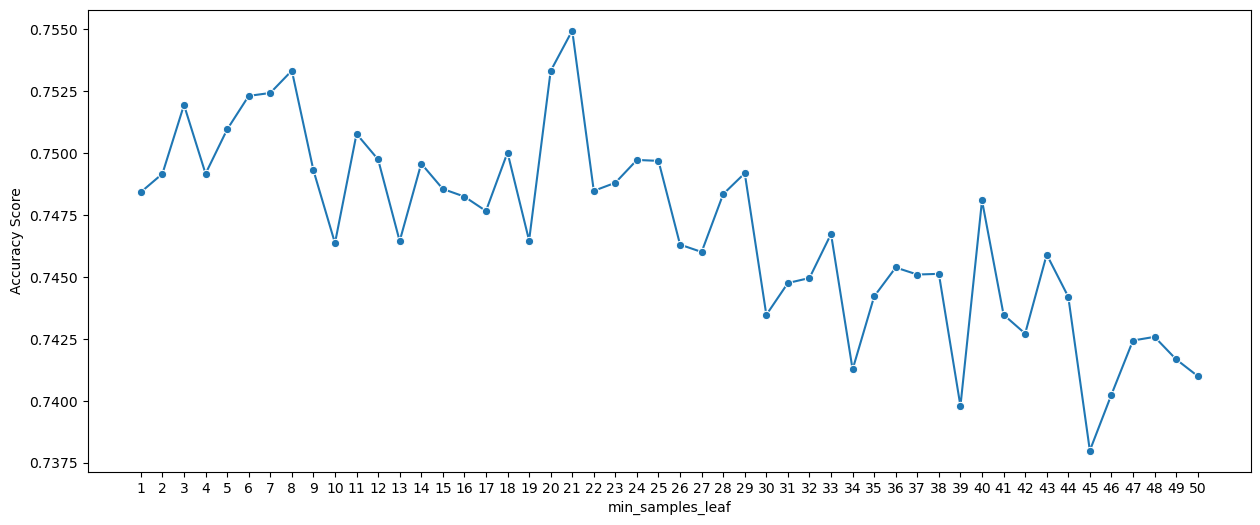

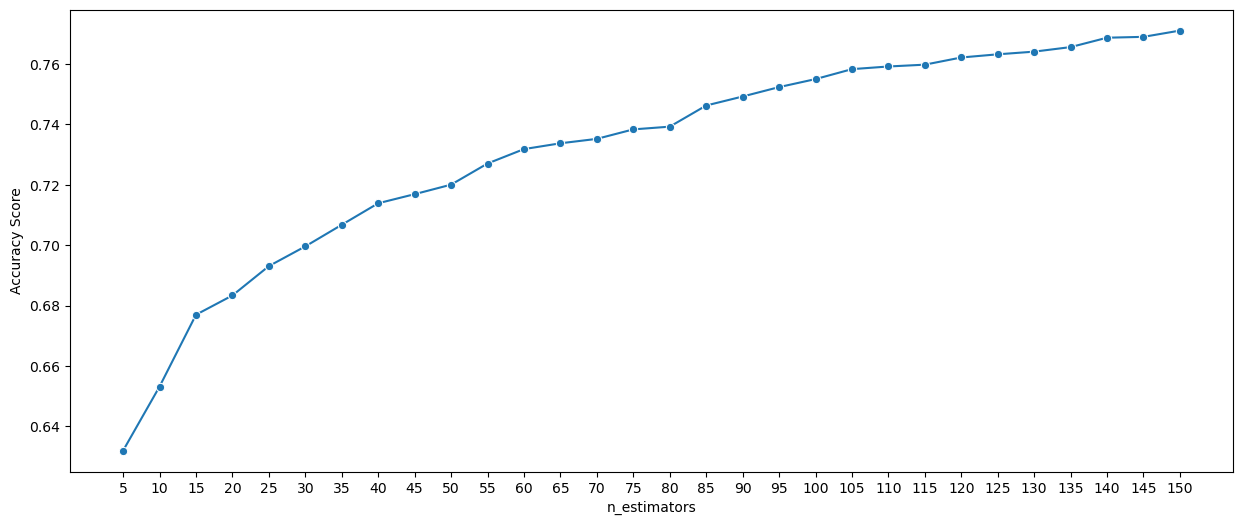

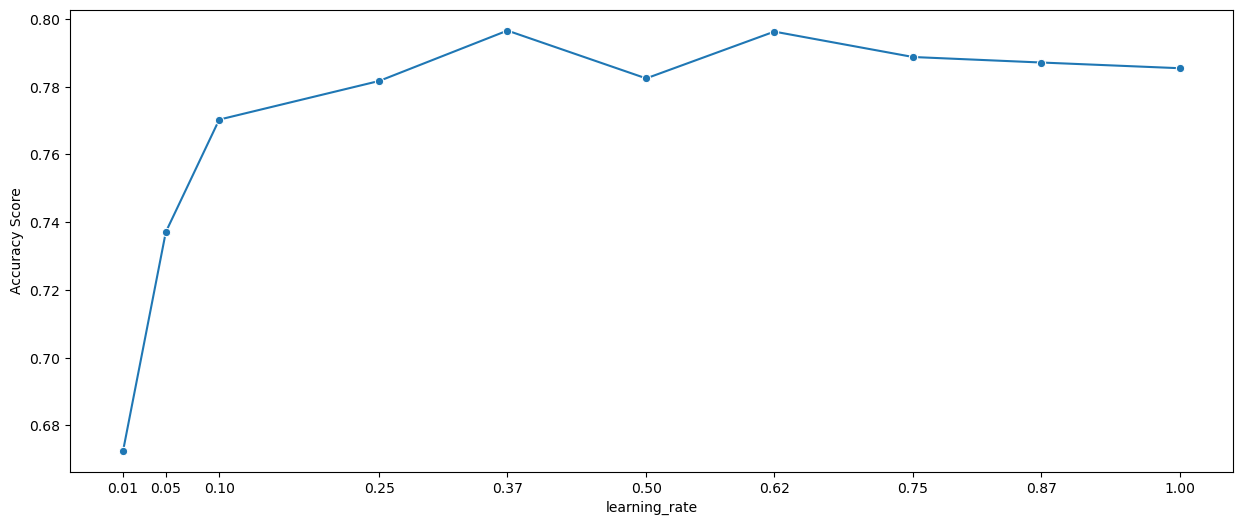

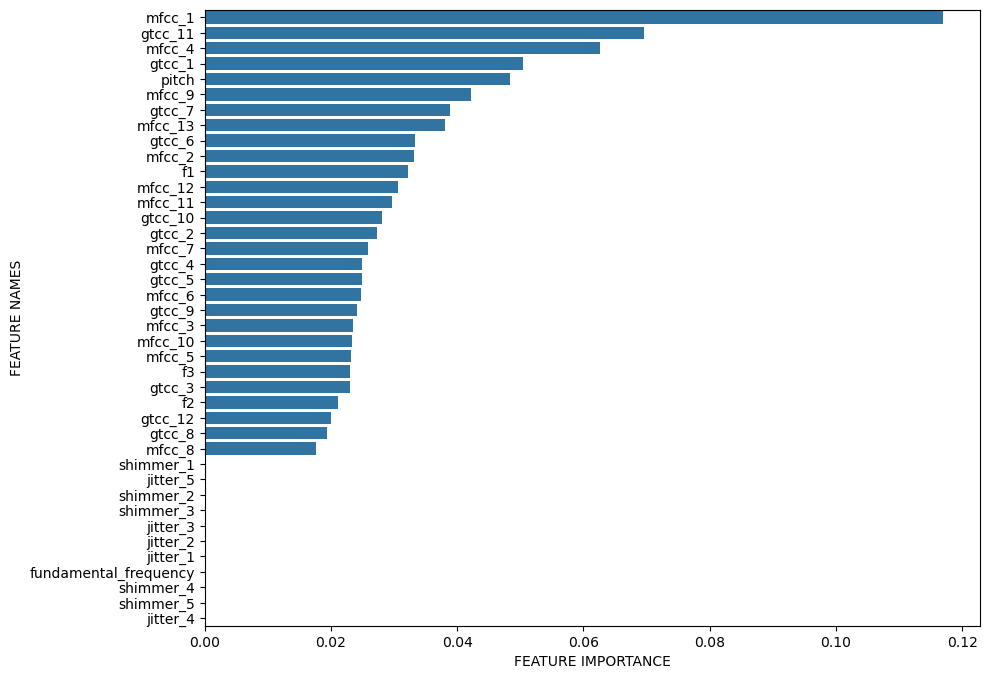

In [17]:
GradientBoostingClassifier = ClasificadorClasico(GradientBoostingClassifier(), 'GBC', X_train, y_train, X.columns)
if BINARY:
    GradientBoostingClassifier.fit_and_plot('loss', ['log_loss', 'exponential'], PLOT)
else:
    GradientBoostingClassifier.fit_and_plot('loss', ['log_loss'], PLOT)
GradientBoostingClassifier.fit_and_plot( 'criterion', ["friedman_mse", "squared_error"], PLOT);
GradientBoostingClassifier.fit_and_plot( 'max_features', ['sqrt', None], PLOT)
GradientBoostingClassifier.fit_and_plot( 'min_samples_leaf',  [i for i in range (1,51)], PLOT);
GradientBoostingClassifier.fit_and_plot( 'n_estimators', [i * 5 for i in range (1,31)], PLOT)
GradientBoostingClassifier.fit_and_plot( 'learning_rate',  [0.01, 0.05, 0.1, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 1], PLOT);
GradientBoostingClassifier.plot_feature_importance()
clasificadores.append(GradientBoostingClassifier)

# LinearDiscriminantAnalysis

c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 637, in fit


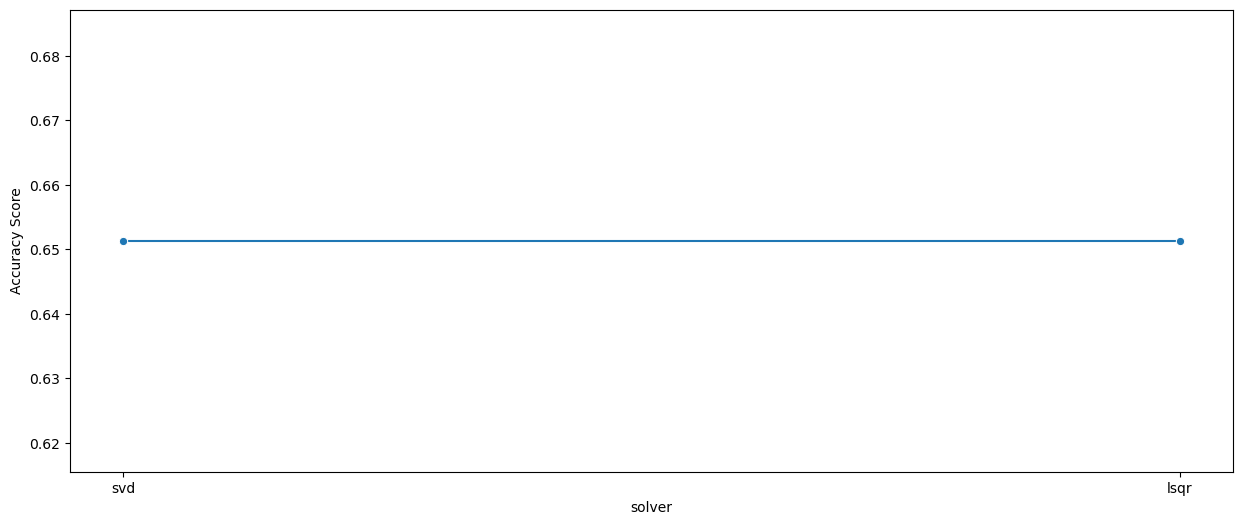

In [18]:
LinearDiscriminantAnalysis = ClasificadorClasico(LinearDiscriminantAnalysis(), 'LDA', X_train, y_train, X.columns)
LinearDiscriminantAnalysis.fit_and_plot('solver', ['svd', 'lsqr', 'eigen'], PLOT)
#LinearDiscriminantAnalysis.plot_feature_importance()
clasificadores.append(LinearDiscriminantAnalysis)

# QuadraticDiscriminantAnalysis

c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


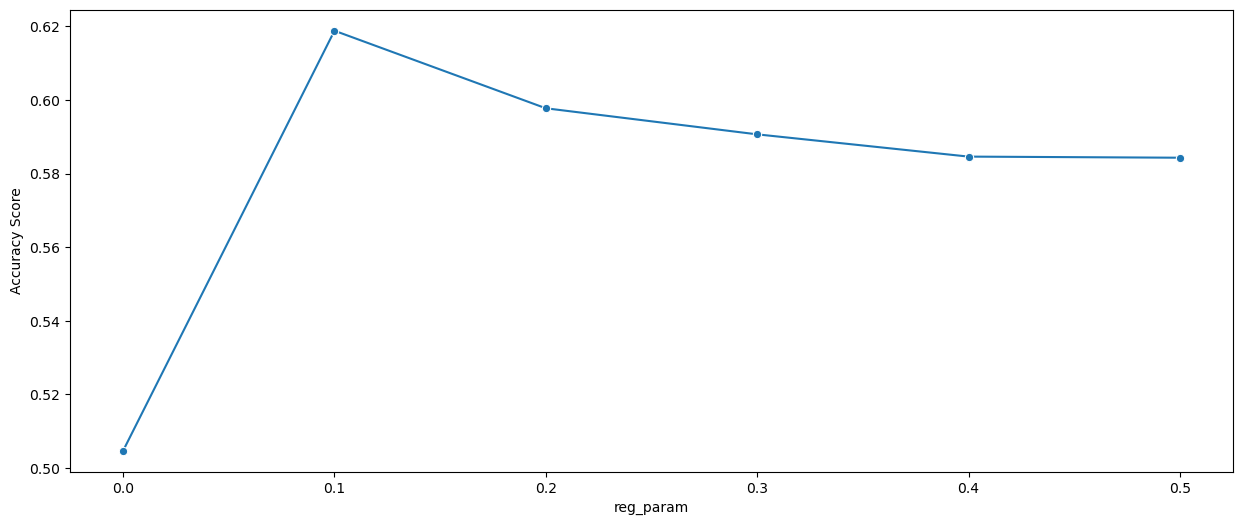

In [19]:
QuadraticDiscriminantAnalysis = ClasificadorClasico(QuadraticDiscriminantAnalysis(), 'QDA', X_train, y_train, X.columns)
QuadraticDiscriminantAnalysis.fit_and_plot( 'reg_param', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], PLOT);
#QuadraticDiscriminantAnalysis.plot_feature_importance()
clasificadores.append(QuadraticDiscriminantAnalysis)

# RandomForestClassifier





Fitting 30 folds for each of 1 candidates, totalling 30 fits


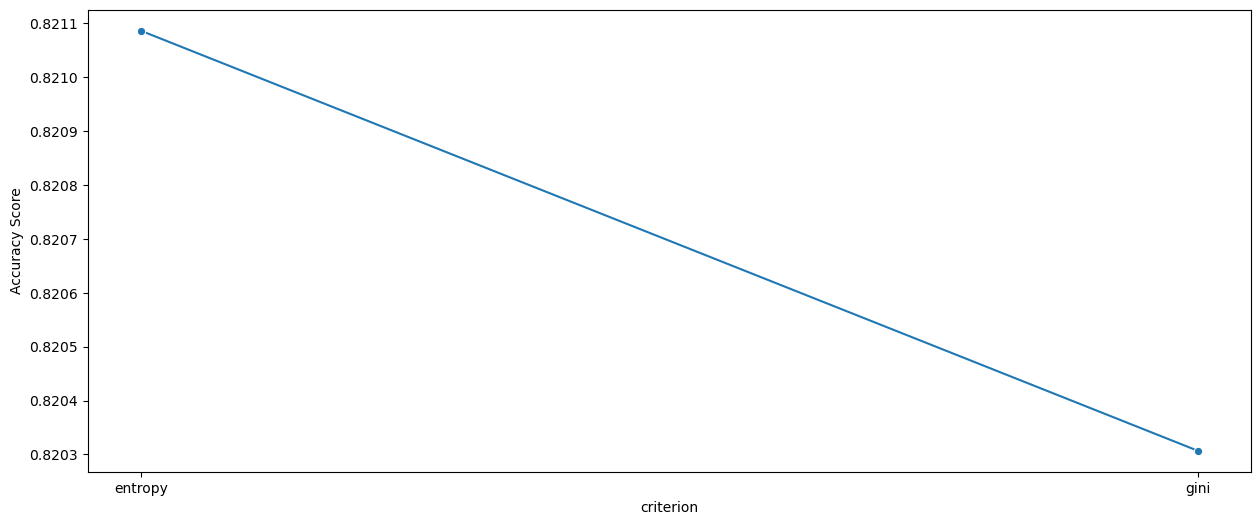

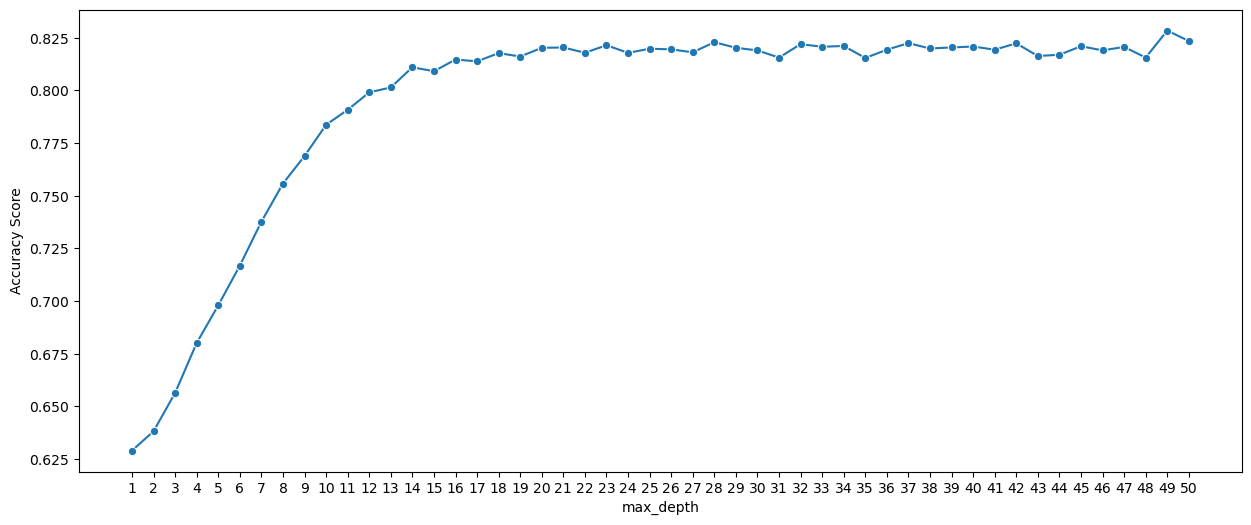

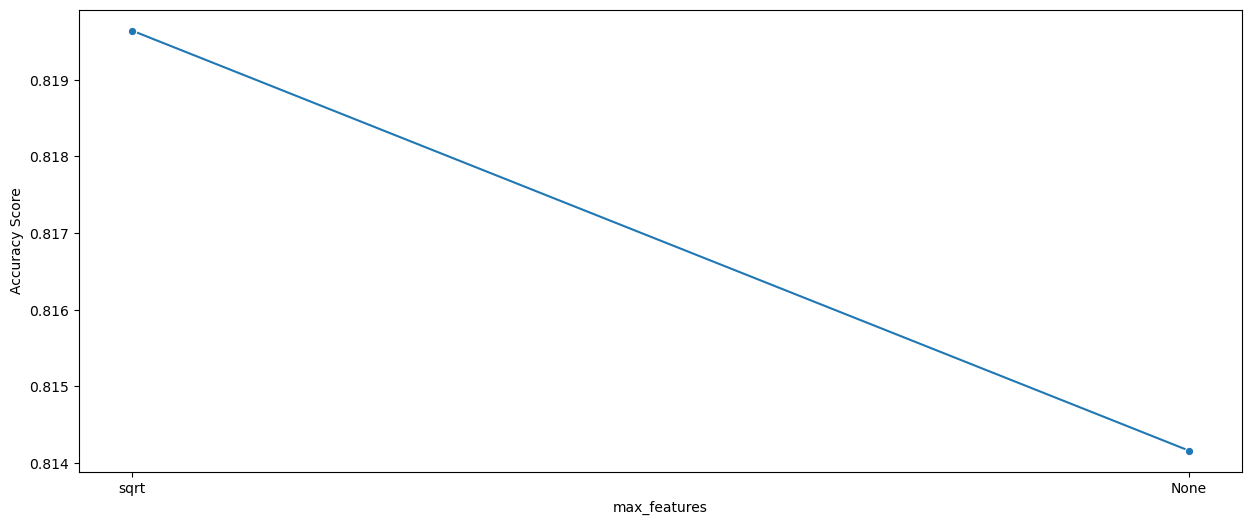

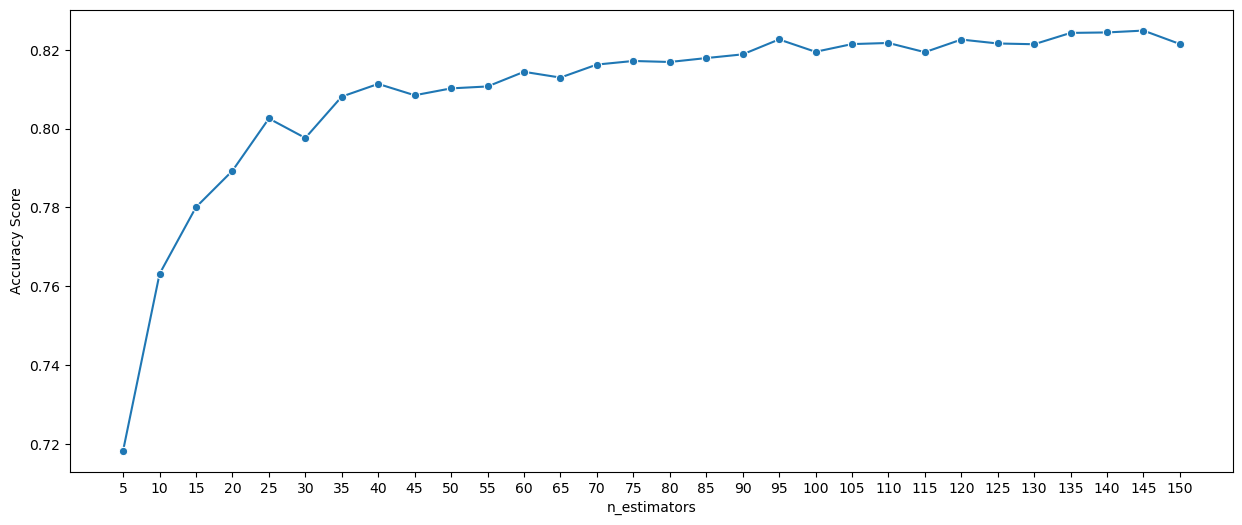

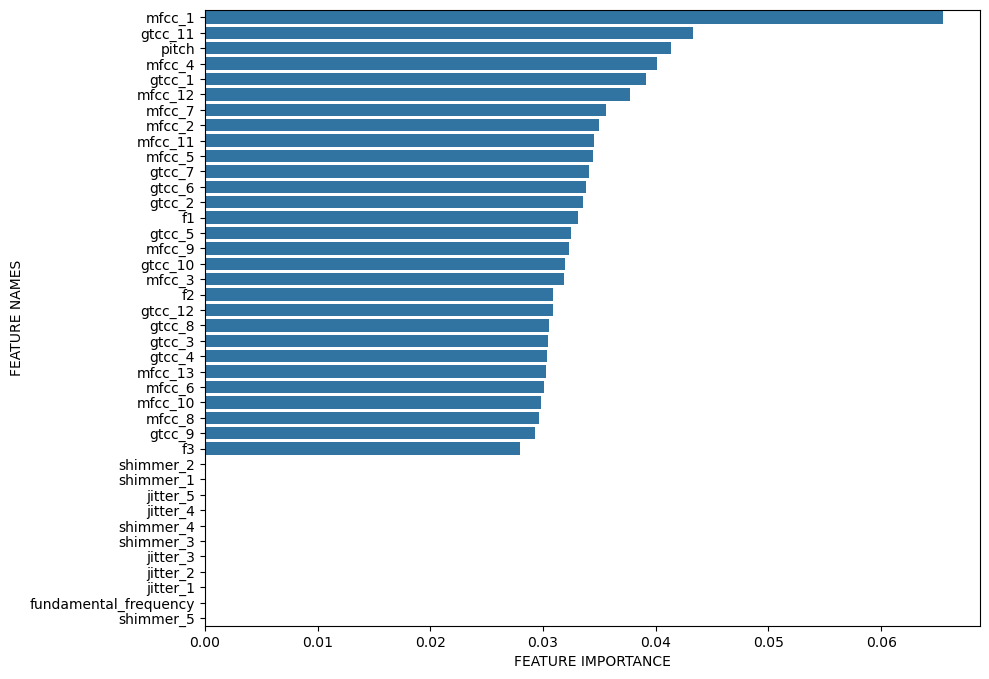

In [20]:
RandomForestClassifier = ClasificadorClasico(RandomForestClassifier(), 'RF', X_train, y_train, X.columns)
RandomForestClassifier.fit_and_plot( 'criterion', ['entropy', 'gini'], PLOT)
RandomForestClassifier.fit_and_plot( 'max_depth', [i for i in range (1,51)], PLOT)
RandomForestClassifier.fit_and_plot( 'max_features', ['sqrt', None], PLOT)
RandomForestClassifier.fit_and_plot( 'n_estimators', [i * 5 for i in range (1,31)], PLOT)
RandomForestClassifier.plot_feature_importance()
clasificadores.append(RandomForestClassifier)

# DecisionTreeClassifier





Fitting 30 folds for each of 1 candidates, totalling 30 fits


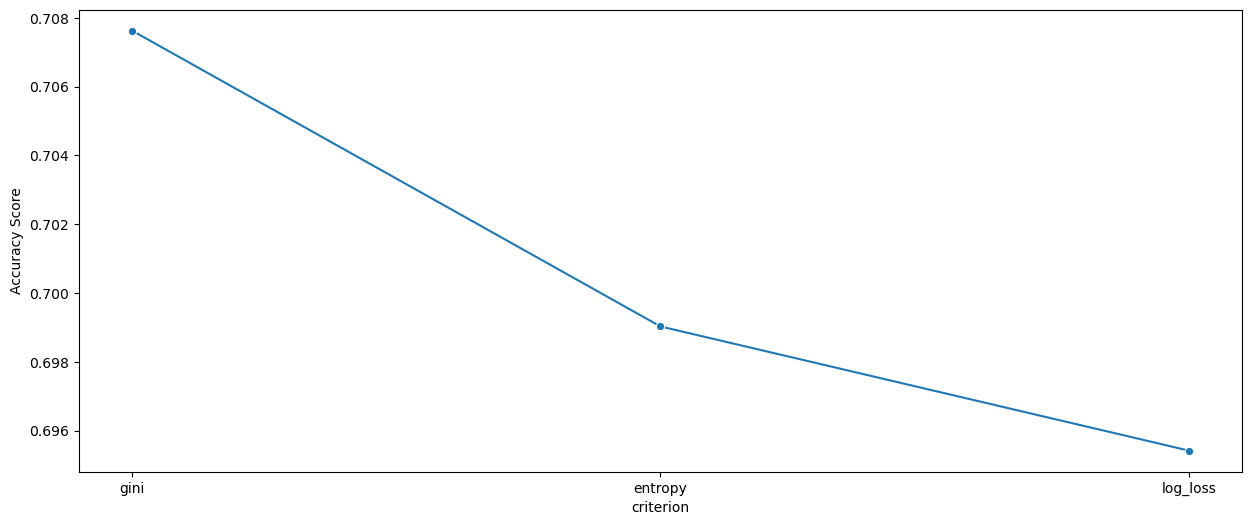

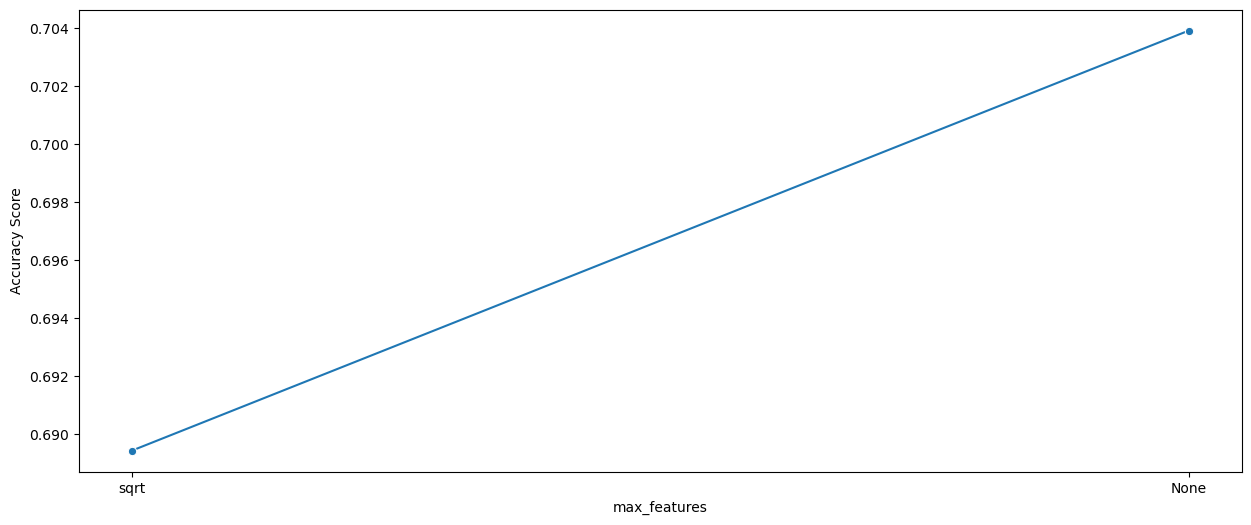

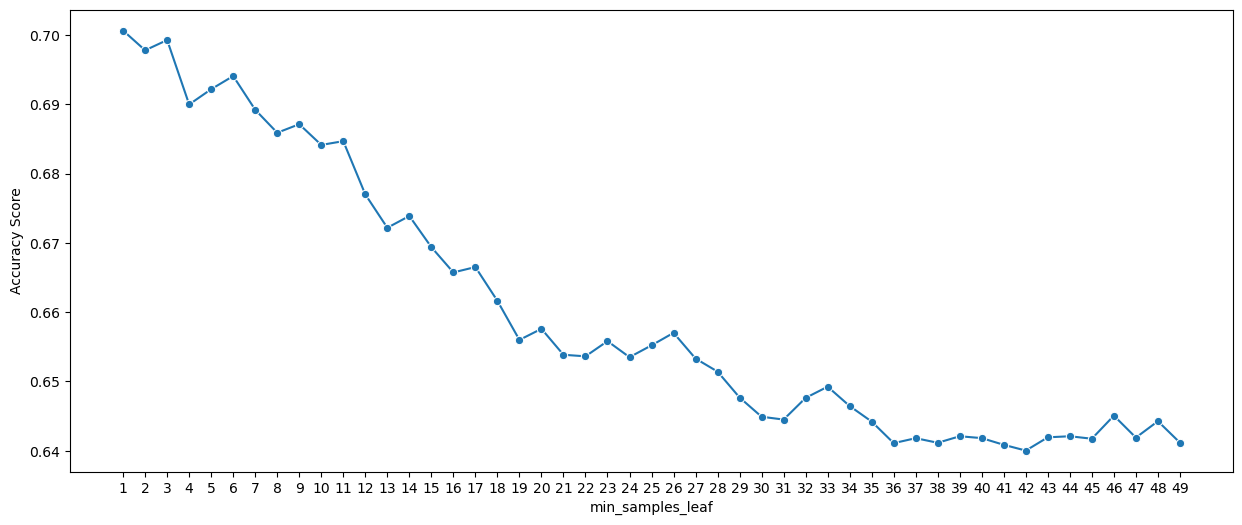

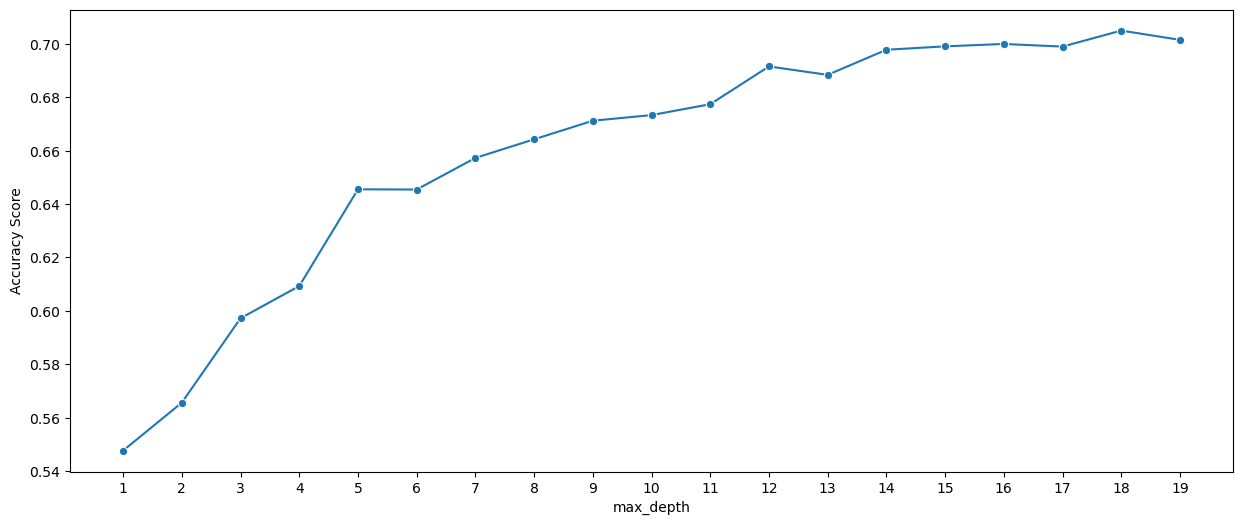

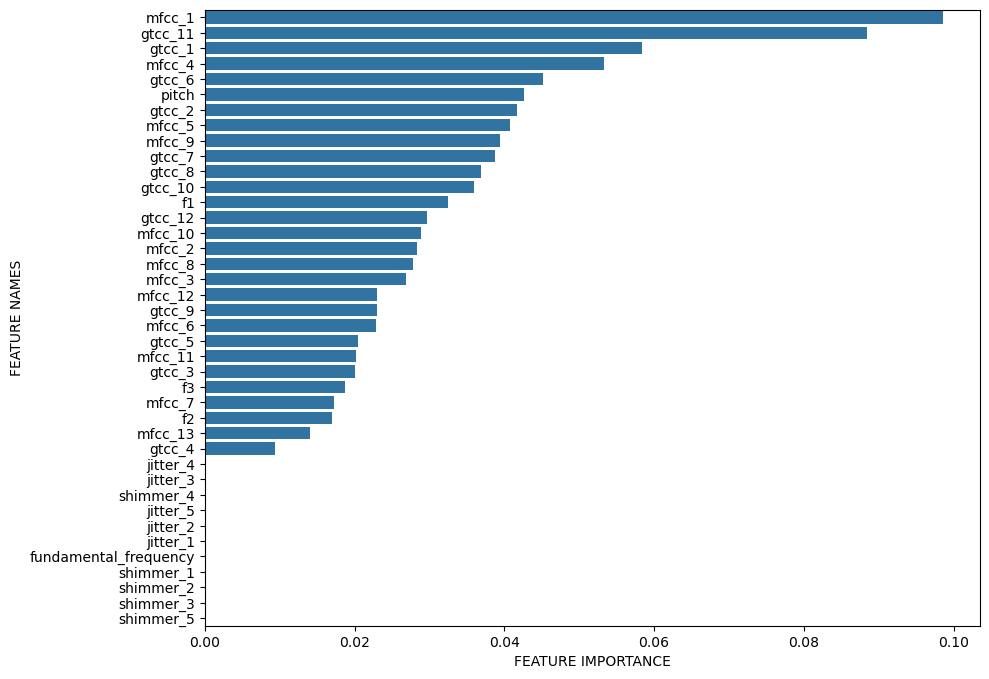

In [21]:
DecisionTreeClassifier = ClasificadorClasico(DecisionTreeClassifier(), 'DT', X_train, y_train, X.columns)
DecisionTreeClassifier.fit_and_plot('criterion', ["gini", "entropy", "log_loss"], PLOT);
DecisionTreeClassifier.fit_and_plot('max_features', ['sqrt', None], PLOT)
DecisionTreeClassifier.fit_and_plot('min_samples_leaf',  [i for i in range (1,50)], PLOT);
DecisionTreeClassifier.fit_and_plot('max_depth', [i for i in range (1,20)], PLOT);
DecisionTreeClassifier.plot_feature_importance()
clasificadores.append(DecisionTreeClassifier)

# KNeighborsClassifier

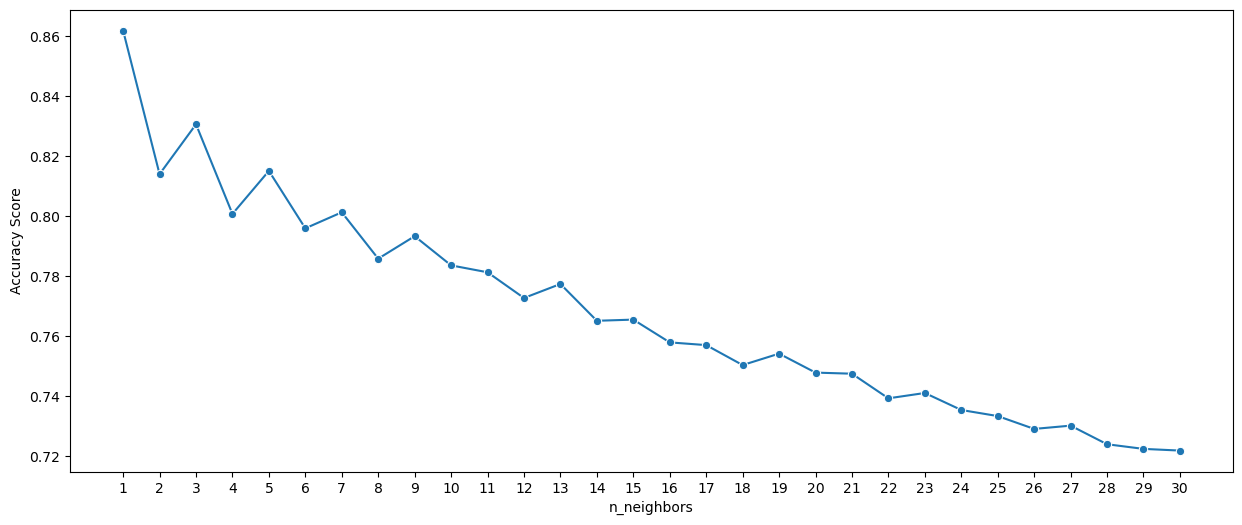

In [22]:
KNeighborsClassifier = ClasificadorClasico(KNeighborsClassifier(), 'KNN', X_train, y_train, X.columns)
KNeighborsClassifier.fit_and_plot('n_neighbors', range(1,31), PLOT);
#KNeighborsClassifier.plot_feature_importance()
clasificadores.append(KNeighborsClassifier)

# Entrenamiento de los clasificadores ya ajustados

In [23]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
dict_val = dict()
dict_test = dict()
dict_time = dict()



for clasificador in clasificadores:
    nombre = clasificador.name
    model = clasificador.classifier

    data_time = []

    X_val, y_val = X_train, y_train

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1_score': make_scorer(f1_score, average='macro')
    }
    val_scoring = cross_validate(model, X_val, y_val, cv=kfold, scoring=scoring)

    accuracy = []
    precision = []
    recall = []
    f1score = []
    
    for i in range(0, 10):
        start = time.time()
        model.fit(X_train, y_train)
        

        y_test_predictions = model.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_test_predictions))
        precision.append(precision_score(y_test, y_test_predictions, average='weighted'))
        recall.append(recall_score(y_test, y_test_predictions, average='weighted'))
        f1score.append(f1_score(y_test, y_test_predictions, average='macro'))
        
        data_time.append(time.time() - start)

    dict_val[nombre] = val_scoring
    dict_test[nombre] = {
        'accuracy': np.array(accuracy),
        'precision': np.array(precision),
        'recall': np.array(recall),
        'f1_score': np.array(f1score)
    }
    dict_time[nombre] = data_time


c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.wa

In [24]:
#Funciones Auxiliares para imprimer en formato Latex
def print_score_latex_(name, accuracy, precision, recall, f1_score):
    print(f"{name} & {accuracy.mean()*100:.2f}±{accuracy.std()*100:.2f} & {precision.mean()*100:.2f}±{precision.std()*100:.2f}" +
    f"& {recall.mean()*100:.2f}±{recall.std()*100:.2f} & {f1_score.mean()*100:.2f}±{f1_score.std()*100:.2f} \\\\")
    
def print_results_val(dict_data):
    for key in dict_data:
        val_scoring = dict_data[key]
        print_score_latex_(key, val_scoring['test_accuracy'], val_scoring['test_precision'],
                           val_scoring['test_recall'], val_scoring['test_f1_score'])
        
def print_results(dict_data):
    for key in dict_data:
        var = dict_data[key]
        print_score_latex_(key, var['accuracy'], var['precision'],
                           var['recall'], var['f1_score'])
        

    
    

# Resultados

## Resultado de la validación

In [25]:
print("Clasificador & Accuracy & Precision & recall & f1_score \\")
print_results_val(dict_val)

Clasificador & Accuracy & Precision & recall & f1_score \
XGB & 83.05±3.02 & 83.24±3.03& 83.05±3.02 & 83.03±3.02 \\
GNB & 60.88±3.62 & 61.03±3.69& 60.88±3.62 & 60.76±3.60 \\
GPC & 69.36±3.15 & 69.46±3.20& 69.36±3.15 & 69.32±3.14 \\
ADA & 70.21±2.39 & 70.36±2.44& 70.21±2.39 & 70.15±2.39 \\
GBC & 79.57±3.11 & 79.67±3.11& 79.57±3.11 & 79.56±3.11 \\
LDA & 65.08±3.41 & 65.18±3.45& 65.08±3.41 & 65.02±3.42 \\
QDA & 63.78±3.47 & 65.30±3.78& 63.78±3.47 & 62.85±3.62 \\
RF & 82.74±3.26 & 82.94±3.23& 82.74±3.26 & 82.71±3.28 \\
DT & 70.65±2.90 & 70.76±2.95& 70.65±2.90 & 70.62±2.89 \\
KNN & 86.48±1.60 & 86.77±1.43& 86.48±1.60 & 86.46±1.63 \\


## Resultado de las pruebas

In [26]:
print("Clasificador & Accuracy & Precision & recall & f1_score \\")
print_results(dict_test)

Clasificador & Accuracy & Precision & recall & f1_score \
XGB & 78.50±0.00 & 78.63±0.00& 78.50±0.00 & 77.94±0.00 \\
GNB & 61.59±0.00 & 63.58±0.00& 61.59±0.00 & 61.43±0.00 \\
GPC & 70.98±0.00 & 71.82±0.00& 70.98±0.00 & 70.58±0.00 \\
ADA & 67.22±0.00 & 67.65±0.00& 67.22±0.00 & 66.55±0.00 \\
GBC & 72.03±0.00 & 72.45±0.00& 72.03±0.00 & 71.47±0.00 \\
LDA & 67.43±0.00 & 68.86±0.00& 67.43±0.00 & 67.17±0.00 \\
QDA & 58.66±0.00 & 64.07±0.00& 58.66±0.00 & 58.55±0.00 \\
RF & 77.79±1.07 & 78.02±1.09& 77.79±1.07 & 77.27±1.11 \\
DT & 69.83±0.56 & 70.11±0.68& 69.83±0.56 & 69.12±0.65 \\
KNN & 81.63±0.00 & 81.73±0.00& 81.63±0.00 & 81.14±0.00 \\


### Imprime los hiperparámetros de cada clasificador

In [27]:

for clasificador in clasificadores:
    nombre = clasificador.name
    print(nombre)
    print(clasificador.params)

XGB
{'n_estimators': [95], 'max_depth': [30], 'min_child_weight': [1], 'gamma': [0.0], 'subsample': [1.0], 'colsample_bytree': [1.0], 'alpha': [0.0], 'learning_rate': [0.3]}
GNB
{'var_smoothing': [0.0001]}
GPC
{'max_iter_predict': [5]}
ADA
{'n_estimators': [150], 'learning_rate': [0.87]}
GBC
{'loss': ['log_loss'], 'criterion': ['friedman_mse'], 'max_features': [None], 'min_samples_leaf': [21], 'n_estimators': [150], 'learning_rate': [0.37]}
LDA
{'solver': ['svd']}
QDA
{'reg_param': [0.1]}
RF
{'criterion': ['entropy'], 'max_depth': [49], 'max_features': ['sqrt'], 'n_estimators': [145]}
DT
{'criterion': ['gini'], 'max_features': [None], 'min_samples_leaf': [1], 'max_depth': [18]}
KNN
{'n_neighbors': [1]}


## Muestra el tiempo de cada clasificador

<module 'matplotlib.pyplot' from 'c:\\Users\\Francisco\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

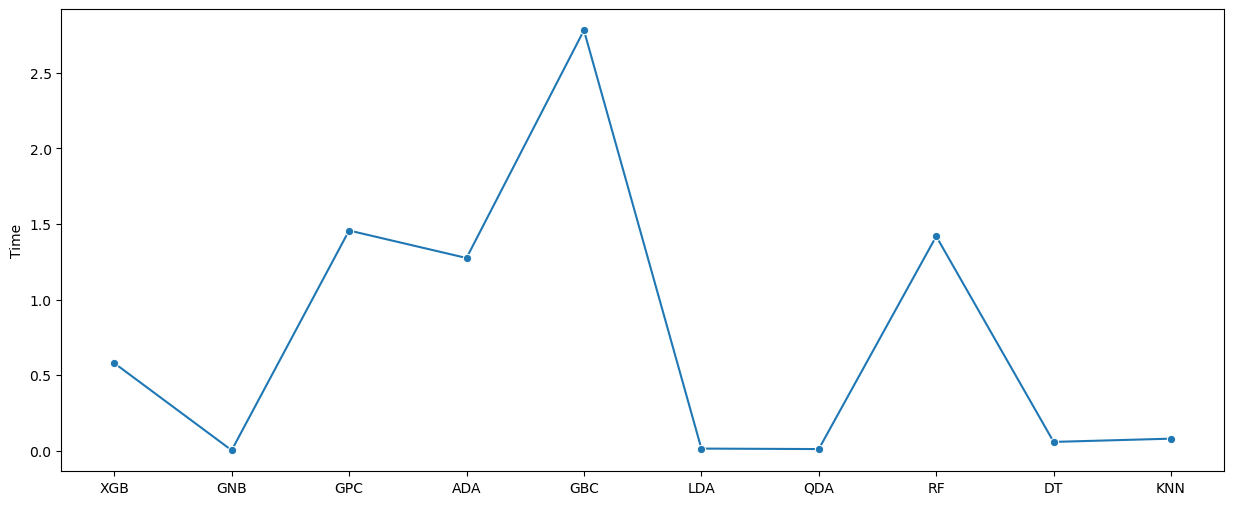

In [28]:

values = []
y = []
for key in dict_time:
        values.append(key)
        y.append(np.array(dict_time[key]).mean())
        
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(x = values, y = y, marker = 'o', ax=ax)
plt.xlabel("")
plt.ylabel("Time")
plt.savefig("Tiempo")
plt